In [93]:
# Import Packages
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import rc
rc('text', usetex=False)
plt.style.use('ggplot')

import numpy  as np
import pandas as pd
from scipy import stats

from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet, LassoCV, RidgeCV, ElasticNetCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, accuracy_score
import sklearn



In [94]:
combine = pd.read_csv('fulldataset.csv') # cleaned and processed data set
df = pd.read_csv('fulldataset_wdummy.csv') # dummified data set
pd.set_option('display.max_columns', None) 

print(df.shape)
df.info()


(2903, 296)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2903 entries, 0 to 2902
Columns: 296 entries, LotFrontage to SaleCondition_Partial
dtypes: float64(22), int64(274)
memory usage: 6.6 MB


In [95]:
y = combine['SalePrice'].dropna()
y = np.log(y)
newtrain = df[:1444]
newtest = df[1444:]
newtest.shape, newtrain.shape, y.shape

((1459, 296), (1444, 296), (1444,))

In [96]:
# Execute train, test, split for Linear model with Ridge, Lasso, and ElasticNet
X_train,X_test,y_train,y_test = train_test_split(newtrain, y, test_size = .30, random_state= 42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape


((1010, 296), (434, 296), (1010,), (434,))

### Ridge

In [97]:
ridge = Ridge()
ridge.set_params(alpha = 0.1, normalize=True)
ridge.fit(X_train, y_train)
print("Ridge train score: ", ridge.score(X_train, y_train))
print('RSS is equal to %.3f' %(np.sum((y_train-ridge.predict(X_train))**2)))
print('the ridge intercept is: %.2f' %(ridge.intercept_))
pd.Series(ridge.coef_, index=X_train.columns)

Ridge train score:  0.9404729511585087
RSS is equal to 8.843
the ridge intercept is: 6.04


LotFrontage              0.000437
LotArea                  0.000002
LotShape                -0.005655
OverallQual              0.037305
YearBuilt                0.000598
                           ...   
SaleCondition_AdjLand    0.062480
SaleCondition_Alloca    -0.002316
SaleCondition_Family    -0.058546
SaleCondition_Normal     0.056660
SaleCondition_Partial    0.012708
Length: 296, dtype: float64

In [69]:
print("Ridge test score: ", ridge.score(X_test, y_test))

Ridge test score:  0.8888107238053415


In [70]:
alphaRange = np.linspace(1e-3,10,30)
ridge.set_params(normalize=True)
coefs  = []
scores = []
for alpha in alphaRange:
        ridge.set_params(alpha=alpha, normalize=True)
        ridge.fit(X_train, y_train)  
        coefs.append(ridge.coef_)
        scores.append(ridge.score(X_train, y_train))
coefs = pd.DataFrame(coefs, index = alphaRange, columns = X_train.columns)  
coefs.head()


,LotFrontage,LotArea,LotShape,OverallQual,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtUnfSF,HeatingQC,CentralAir,LowQualFinSF,GrLivArea,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,MoSold,TotalBaths,PorchSF,TotalSF,MSSubClass_150,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSSubClass_20,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_NoSeWa,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_None,FireplaceQu_Po,FireplaceQu_TA,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_None,GarageYrBlt_1896.0,GarageYrBlt_1900.0,GarageYrBlt_1906.0,GarageYrBlt_1908.0,GarageYrBlt_1910.0,GarageYrBlt_1914.0,GarageYrBlt_1915.0,GarageYrBlt_1916.0,GarageYrBlt_1917.0,GarageYrBlt_1918.0,GarageYrBlt_1919.0,GarageYrBlt_1920.0,GarageYrBlt_1921.0,GarageYrBlt_1922.0,GarageYrBlt_1923.0,GarageYrBlt_1924.0,GarageYrBlt_1925.0,GarageYrBlt_1926.0,GarageYrBlt_1927.0,GarageYrBlt_1928.0,GarageYrBlt_1929.0,GarageYrBlt_1930.0,GarageYrBlt_1931.0,GarageYrBlt_1932.0,GarageYrBlt_1933.0,GarageYrBlt_1934.0,GarageYrBlt_1935.0,GarageYrBlt_1936.0,GarageYrBlt_1937.0,GarageYrBlt_1938.0,GarageYrBlt_1939.0,GarageYrBlt_1940.0,GarageYrBlt_1941.0,GarageYrBlt_1942.0,GarageYrBlt_1943.0,GarageYrBlt_1945.0,GarageYrBlt_1946.0,GarageYrBlt_1947.0,GarageYrBlt_1948.0,GarageYrBlt_1949.0,GarageYrBlt_1950.0,GarageYrBlt_1951.0,GarageYrBlt_1952.0,GarageYrBlt_1953.0,GarageYrBlt_1954.0,GarageYrBlt_1955.0,GarageYrBlt_1956.0,GarageYrBlt_1957.0,GarageYrBlt_1958.0,GarageYrBlt_1959.0,GarageYrBlt_1960.0,GarageYrBlt_1961.0,GarageYrBlt_1962.0,GarageYrBlt_1963.0,GarageYrBlt_1964.0,GarageYrBlt_1965.0,GarageYrBlt_1966.0,GarageYrBlt_1967.0,G

Text(0.5, 1.0, 'Change of Ridge Slopes Varying Alpha')

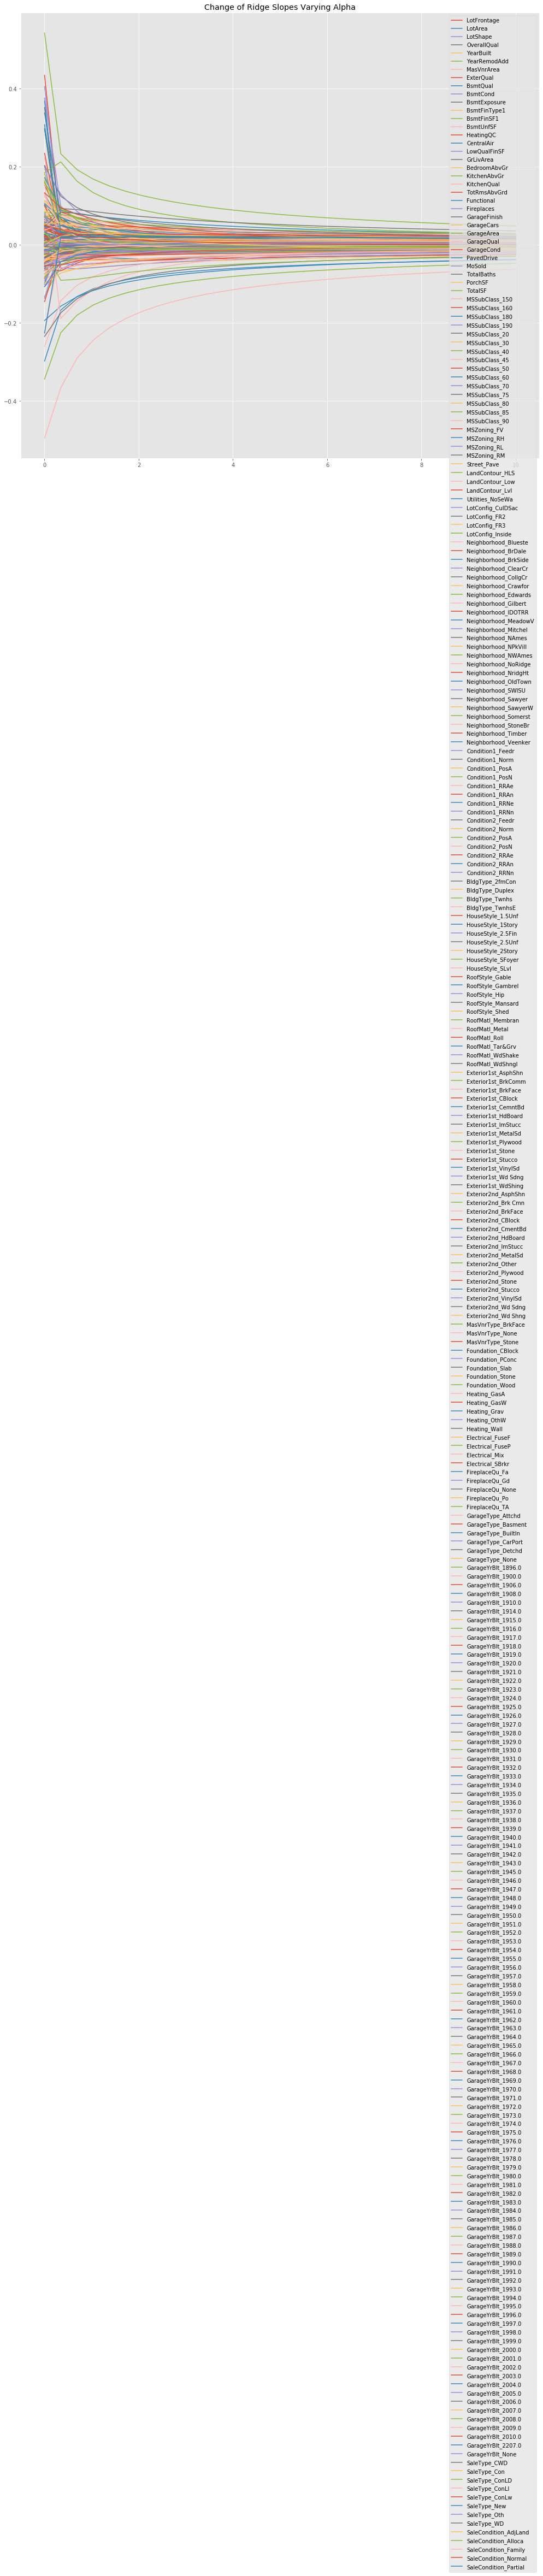

In [71]:
# Use visualization to narrow down the range of alpha to do cross validation
f, ax = plt.subplots(figsize=(17, 15))
for name in coefs.columns:
    plt.plot(alphaRange, coefs[name], label=name)
plt.legend(loc=1)    
plt.title('Change of Ridge Slopes Varying Alpha')

#### Ridge Cross Validation

In [72]:
ridge_cv = RidgeCV(alphas=[1e-3, 1e-2, 1e-1, 1],cv=10)
ridge_cv.fit(X_train,y_train)
ridge_bestalpha=round(ridge_cv.alpha_,3)

# Best alpha value according to ridge cross validation
ridge_bestalpha 

1.0

#### Fitting a Linear Regression Model with Ridge at 1

In [73]:
ridge.set_params(alpha = 1, normalize=True)
ridge.fit(X_train, y_train)
print("Ridge train score: ", ridge.score(X_train, y_train))
print('RSS is equal to %.3f' %(np.sum((y_train-ridge.predict(X_train))**2)))
print("Ridge test score: ", ridge.score(X_test, y_test))

Ridge train score:  0.9113251780868661
RSS is equal to 13.173
Ridge test score:  0.8938141082557829


### Lasso

In [74]:
lasso.set_params(alpha = 0.1, normalize=True)
lasso.fit(X_train, y_train)
# print('the ridge intercept is: %.2f' %(ridge.intercept_))
# pd.Series(ridge.coef_, index=x_train.columns)
print("Lasso train score: ", lasso.score(X_train, y_train))
print("Lasso test score: ", lasso.score(X_test, y_test))

Lasso train score:  0.0
Lasso test score:  -0.016842905109646145


In [75]:
lasso  = Lasso()
alphaRange = np.linspace(1e-3,20,20)
lasso.set_params(normalize=True) 
coefs_lasso  = []
scores = []

for alpha in alphaRange:
        lasso.set_params(alpha=alpha)
        lasso.fit(X_train, y_train)  
        coefs_lasso.append(lasso.coef_)
        scores.append(lasso.score(X_train, y_train))

coefs_lasso = pd.DataFrame(coefs_lasso, index = alphaRange, columns = X_train.columns)  
coefs_lasso.head()

,LotFrontage,LotArea,LotShape,OverallQual,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtUnfSF,HeatingQC,CentralAir,LowQualFinSF,GrLivArea,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,MoSold,TotalBaths,PorchSF,TotalSF,MSSubClass_150,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSSubClass_20,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_NoSeWa,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_None,FireplaceQu_Po,FireplaceQu_TA,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_None,GarageYrBlt_1896.0,GarageYrBlt_1900.0,GarageYrBlt_1906.0,GarageYrBlt_1908.0,GarageYrBlt_1910.0,GarageYrBlt_1914.0,GarageYrBlt_1915.0,GarageYrBlt_1916.0,GarageYrBlt_1917.0,GarageYrBlt_1918.0,GarageYrBlt_1919.0,GarageYrBlt_1920.0,GarageYrBlt_1921.0,GarageYrBlt_1922.0,GarageYrBlt_1923.0,GarageYrBlt_1924.0,GarageYrBlt_1925.0,GarageYrBlt_1926.0,GarageYrBlt_1927.0,GarageYrBlt_1928.0,GarageYrBlt_1929.0,GarageYrBlt_1930.0,GarageYrBlt_1931.0,GarageYrBlt_1932.0,GarageYrBlt_1933.0,GarageYrBlt_1934.0,GarageYrBlt_1935.0,GarageYrBlt_1936.0,GarageYrBlt_1937.0,GarageYrBlt_1938.0,GarageYrBlt_1939.0,GarageYrBlt_1940.0,GarageYrBlt_1941.0,GarageYrBlt_1942.0,GarageYrBlt_1943.0,GarageYrBlt_1945.0,GarageYrBlt_1946.0,GarageYrBlt_1947.0,GarageYrBlt_1948.0,GarageYrBlt_1949.0,GarageYrBlt_1950.0,GarageYrBlt_1951.0,GarageYrBlt_1952.0,GarageYrBlt_1953.0,GarageYrBlt_1954.0,GarageYrBlt_1955.0,GarageYrBlt_1956.0,GarageYrBlt_1957.0,GarageYrBlt_1958.0,GarageYrBlt_1959.0,GarageYrBlt_1960.0,GarageYrBlt_1961.0,GarageYrBlt_1962.0,GarageYrBlt_1963.0,GarageYrBlt_1964.0,GarageYrBlt_1965.0,GarageYrBlt_1966.0,GarageYrBlt_1967.0,G

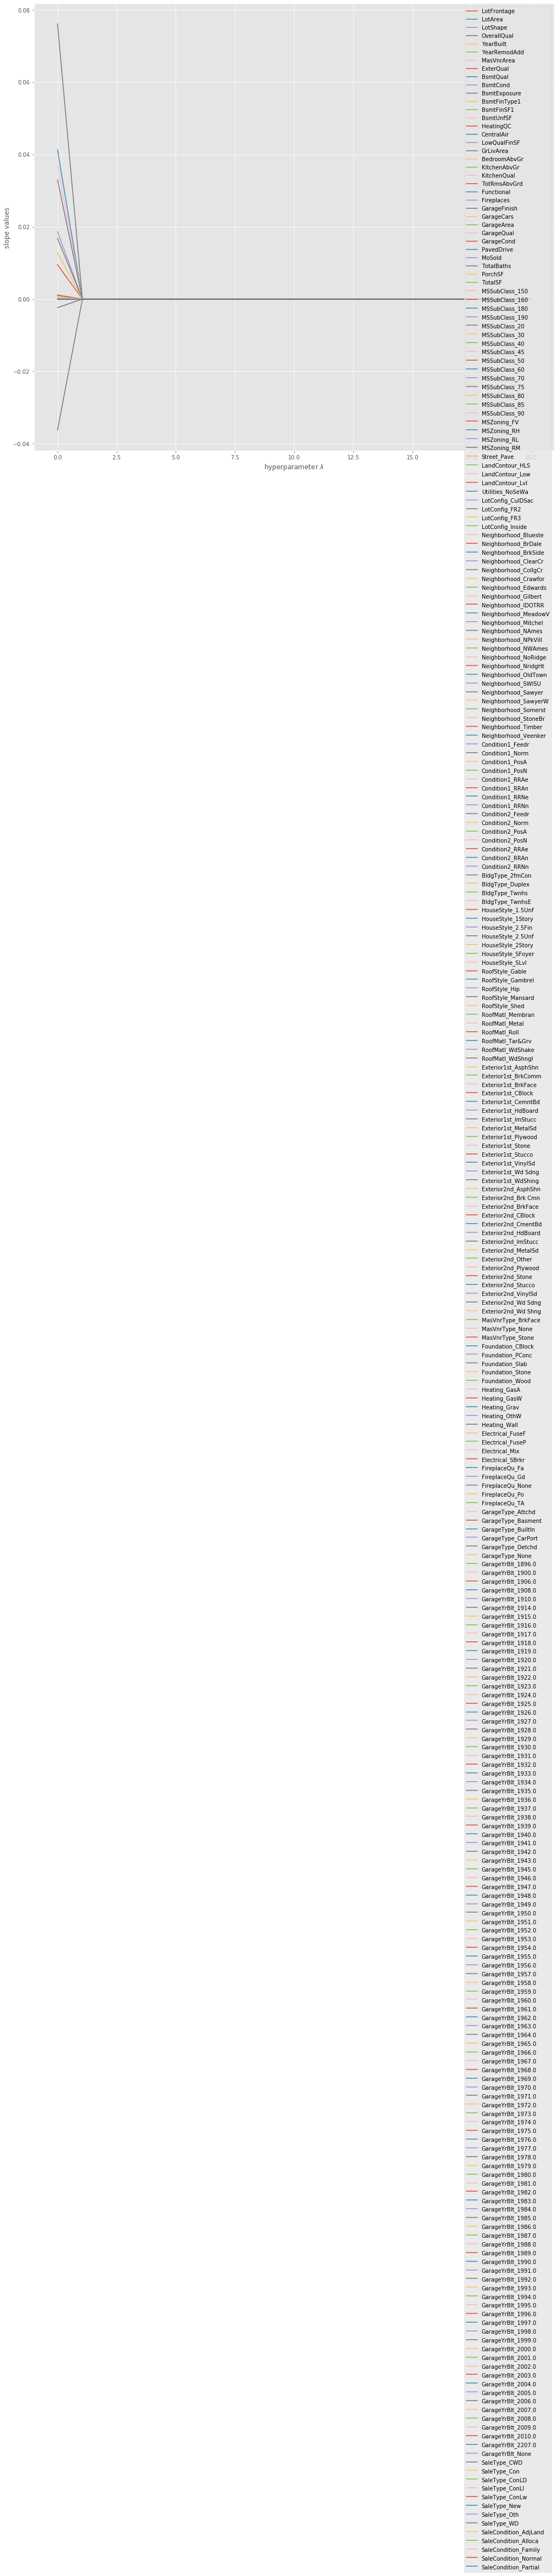

In [76]:
# Use visualization to narrow down the range of alpha to do cross validation
f, ax = plt.subplots(figsize=(17, 15))
for name in coefs.columns:
    plt.plot(coefs_lasso.index, coefs_lasso[name], label=name)
plt.xlabel(r'hyperparameter $\lambda$')
plt.ylabel(r'slope values')
plt.legend(loc=1)   
# This does not show you where the hyperparameter should be

#### Lasso Cross Validation

In [77]:
lasso_cv = LassoCV(alphas=[1e-3, 1e-2, 1e-3, 1, 2],cv=10)
lasso_cv.fit(X_train,y_train)
lasso_bestalpha=round(lasso_cv.alpha_,3)

In [78]:
# Best alpha value according to ridge cross validation
lasso_bestalpha

0.001

#### Fitting a Linear Regression Model with Lasso at 0.001

In [79]:
lasso = Lasso()
lasso.set_params(alpha = 0.001, normalize=True)
lasso.fit(X_train, y_train)
print("Lasso train score: ", lasso.score(X_train, y_train))
print('RSS is equal to %.3f' %(np.sum((y_train-lasso.predict(X_train))**2)))
print("Lasso test score: ", lasso.score(X_test, y_test))

Lasso train score:  0.8575179592441637
RSS is equal to 21.167
Lasso test score:  0.8764887050871156


In [80]:
lasso_coefs = pd.Series(lasso.coef_, index=X_train.columns)
lasso_coefs = np.abs(lasso_coefs).sort_values(ascending=False)
zero_coefs = lasso_coefs[lasso_coefs.values==0]

In [83]:
# Lasso indicates that there are 276 features with 0 coefficients
# We can possibly drop some of these
print(len(zero_coefs))
print(zero_coefs)

276
BldgType_2fmCon       0.0
BldgType_Duplex       0.0
BldgType_Twnhs        0.0
RoofStyle_Gable       0.0
BldgType_TwnhsE       0.0
                     ... 
GarageYrBlt_1927.0    0.0
GarageYrBlt_1928.0    0.0
GarageYrBlt_1929.0    0.0
GarageYrBlt_1930.0    0.0
LotFrontage           0.0
Length: 276, dtype: float64


In [100]:
# These are features that have coefficients greater than 0 at alpha 2
significant_feat = lasso_coefs[lasso_coefs.values>0].sort_values(ascending=False)
pd.Series(significant_feat)

OverallQual          7.609837e-02
CentralAir           4.126533e-02
KitchenQual          3.688449e-02
MSZoning_RM          3.625271e-02
TotalBaths           3.294864e-02
Fireplaces           1.862262e-02
GarageFinish         1.680169e-02
GarageCars           1.271793e-02
ExterQual            9.478927e-03
FireplaceQu_None     2.377587e-03
YearRemodAdd         1.164068e-03
HeatingQC            9.787742e-04
GarageType_Attchd    5.477889e-04
YearBuilt            3.871165e-04
TotalSF              1.592307e-04
GarageArea           1.317889e-04
GrLivArea            3.190666e-05
BsmtFinSF1           1.864635e-05
PorchSF              1.284876e-05
LotArea              5.248903e-07
dtype: float64

### ElasticNet

In [84]:
elasticnet = ElasticNet(alpha=0.1, l1_ratio=0.5, normalize=True)
elasticnet.fit(X_train, y_train)
print(r'The R^2 is %.2f' %(elasticnet.score(X_train, y_train)))
print('RSS is equal to %.3f' %(np.sum((y_train-elasticnet.predict(X_train))**2)))
print("R^2 for test is %.2f" %(elasticnet.score(X_test, y_test)))
# elasticnet.coef_,  elasticnet.intercept_

The R^2 is 0.00
RSS is equal to 148.557
R^2 for test is -0.02


#### Cross Validation with ElasticNet

In [85]:
rhoRange = np.linspace(0.1,1, 10)
elasticnet_cv = ElasticNetCV(l1_ratio=rhoRange, eps=0.001, n_alphas=100, alphas=[1e-3, 1e-2, 1e-3, 1, 2], cv=10)
elasticnet_cv.fit(X_train, y_train)


ElasticNetCV(alphas=[0.001, 0.01, 0.001, 1, 2], copy_X=True, cv=10, eps=0.001,
             fit_intercept=True,
             l1_ratio=array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
             max_iter=1000, n_alphas=100, n_jobs=None, normalize=False,
             positive=False, precompute='auto', random_state=None,
             selection='cyclic', tol=0.0001, verbose=0)

In [86]:
print(round(elasticnet_cv.alpha_,3)) # Best alpha value
print(round(elasticnet_cv.l1_ratio_,3)) # Best rho value


0.001
0.6


In [87]:
# elasticnet = ElasticNet(alpha=0.01, l1_ratio=0.1, normalize=True)
# elasticnet.fit(X_train, y_train)
print(r'The R^2 is %.2f' %(elasticnet_cv.score(X_train, y_train)))
print('RSS is equal to %.3f' %(np.sum((y_train-elasticnet_cv.predict(X_train))**2)))
print("R^2 for test is %.2f" %(elasticnet_cv.score(X_test, y_test)))


The R^2 is 0.92
RSS is equal to 11.658
R^2 for test is 0.92


In [88]:
print("Root mean squared error is %.2f" %(mean_squared_error(y_train, elasticnet_cv.predict(X_train), squared=False)))

Root mean squared error is 0.11


In [89]:
predictions = elasticnet_cv.predict(newtest)
predictions = np.e**predictions # to reverse the log on SalePrice
newtest.loc[:, 'SalePrice'] = predictions
predictions = pd.Series(predictions)
predictions.shape

/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:844: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


(1459,)

In [90]:
id_no = pd.Series(range(1461,2920))
ElasticNetPred = pd.concat([id_no,predictions],axis=1)
ElasticNetPred.columns = ['Id','SalePrice']

In [91]:
ElasticNetPred = ElasticNetPred.dropna()
ElasticNetPred.to_csv('ElasticNetPred.csv', index=False)

In [92]:
ElasticNetPred.head()

,Id,SalePrice
0,1461,115478.188291
1,1462,159411.064810
2,1463,183356.366437
3,1464,200732.597691
4,1465,191182.963247
